In [21]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.io as pio
pio.renderers.default = "vscode"  

plt.rcParams.update({
    "mathtext.default": "regular"
})

df = pd.read_csv('C:/Users/sahil/OneDrive/Desktop/python/climate_emissions_analysis/data/owid-co2-data.csv')

In [22]:
# print(df.shape) 
# print(df.columns)
# print(round(df[['year', 'co2', 'co2_per_capita', 'population', 'gdp']].describe(), 2))
# print(df['year'].min(), df['year'].max())
# print(df['country'].nunique())
# print(df.isnull().sum())


Filtering:

In [23]:
# print(df[df['iso_code'].isna()]['country'].unique())
df_countries = df[df['iso_code'].notna()]
# print(df_countries['country'].nunique())
co22024=df_countries[df_countries['year']==2024][['country', 'co2']]
top10 = co22024.sort_values('co2', ascending=False).head(10)


Visualisation:

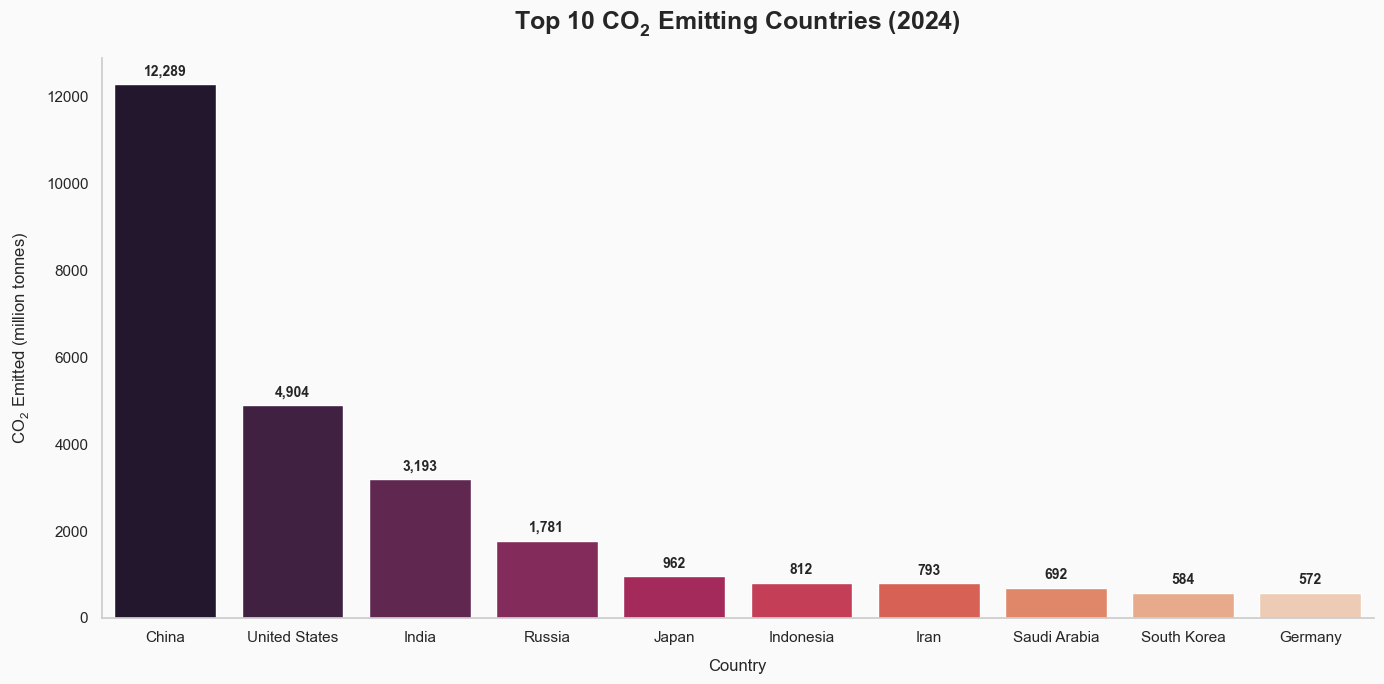

In [24]:
fig, ax = plt.subplots(figsize=(14, 7))
fig.patch.set_facecolor('#FAFAFA')
ax.set_facecolor('#FAFAFA')

bars = sns.barplot(data=top10, x='country', y='co2', 
                   palette='rocket', hue='country', 
                   legend=False, ax=ax)


for p in ax.patches:
    ax.annotate(f'{p.get_height():,.0f}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center',
                xytext=(0, 9),
                textcoords='offset points',
                fontsize=10,
                fontweight='bold')

sns.despine()
ax.grid(False)
ax.set_title('Top 10 $CO_2$ Emitting Countries (2024)', 
             fontsize=18, fontweight='bold', pad=20)
ax.set_xlabel('Country', fontsize=12, labelpad=10)
ax.set_ylabel('$CO_2$ Emitted (million tonnes)', fontsize=12, labelpad=10)
ax.tick_params(axis='both', labelsize=11)
plt.tight_layout()
plt.savefig('top10co2emit2024.png', dpi=150, bbox_inches='tight')
plt.show()


The bar graph shows the 10 countries that emitted the most CO² in 2024. China dominates by a significant margin, emitting more than double that of second-place USA, it is a reflection of its role as the world's manufacturing hub. The USA, despite being a highly developed economy, still ranks second, contrasting with other Western nations that have made more significant emission reductions. India ranks third, driven by rapid industrialization and growing energy demands.

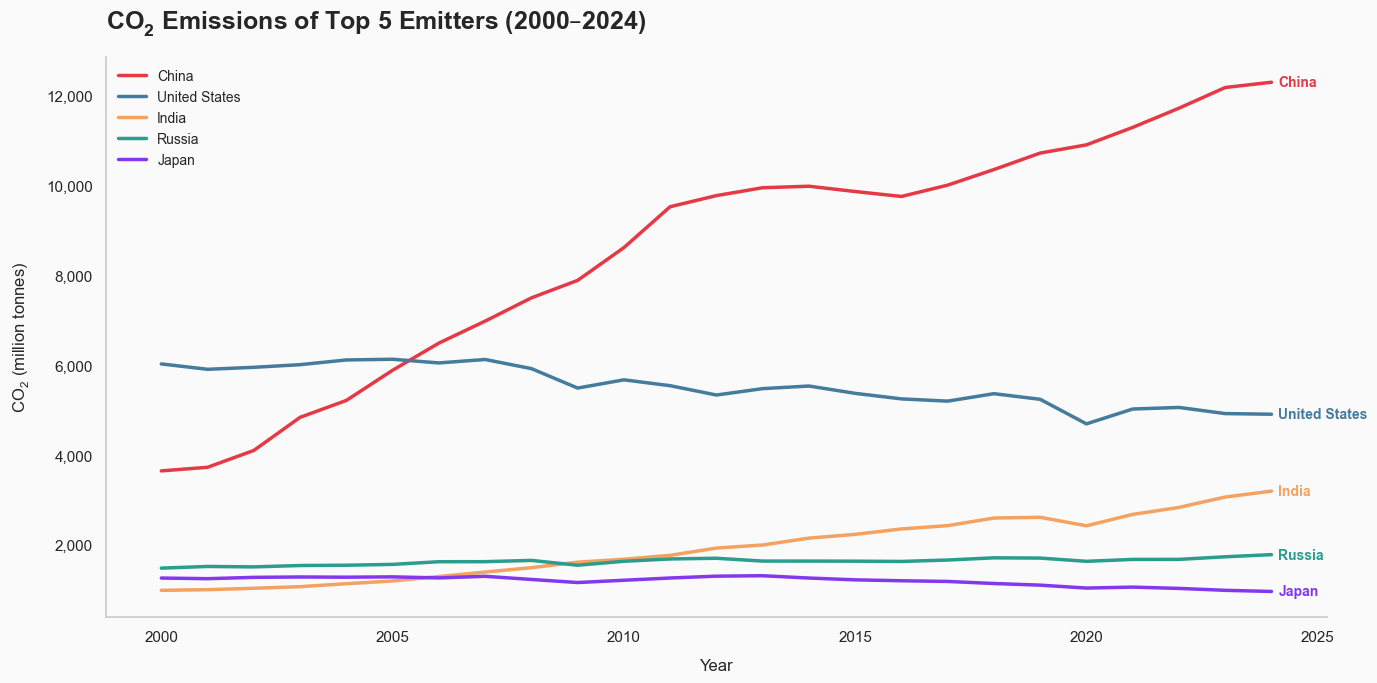

In [25]:
top5 = top10.head(5)
top5_countries = top5['country'].tolist()
# print(top5_countries)
df_top5 = df_countries[(df_countries['country'].isin(top5_countries)) & (df_countries['year'] >= 2000)]

import matplotlib.ticker as ticker

colors = {
    'China': '#E63946',
    'United States': '#457B9D', 
    'India': '#F4A261',
    'Russia': '#2A9D8F',
    'Japan': '#8338EC'
}


legend_order = top5.sort_values('co2', ascending=False)['country'].tolist()

fig, ax = plt.subplots(figsize=(14, 7))
fig.patch.set_facecolor('#FAFAFA')
ax.set_facecolor('#FAFAFA')

for country in legend_order:
    data = df_top5[df_top5['country'] == country]
    ax.plot(data['year'], data['co2'], 
            label=country, 
            color=colors[country], 
            linewidth=2.5)
    ax.annotate(country, 
                xy=(data['year'].iloc[-1], data['co2'].iloc[-1]),
                xytext=(5, 0),
                textcoords='offset points',
                color=colors[country],
                fontsize=10,
                fontweight='bold',
                va='center')

sns.despine()
ax.grid(False)
ax.set_title('$CO_2$ Emissions of Top 5 Emitters (2000–2024)', 
             fontsize=18, fontweight='bold', pad=20, loc='left')
ax.set_xlabel('Year', fontsize=12, labelpad=10)
ax.set_ylabel('$CO_2$ (million tonnes)', fontsize=12, labelpad=10)
ax.tick_params(axis='both', labelsize=11)
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{x:,.0f}'))
plt.legend(handles=[plt.Line2D([0], [0], color=colors[c], linewidth=2.5, label=c) 
                    for c in legend_order], 
           fontsize=10, frameon=False)
plt.tight_layout()
plt.savefig('co2topemit2000.png', dpi=150, bbox_inches='tight')
plt.show()


This line graph tracks CO² emissions of the top 5 emitting countries from 2000 to 2024. China, which trailed the USA at the turn of the century, surpassed it around 2005 and has grown exponentially since. India is the only other country in this group with a consistently rising trajectory, reflecting both nations' ongoing industrialization and development. In contrast, the USA, Russia, and Japan have all recorded net reductions over the same period, suggesting that the world's most developed economies are beginning to decouple growth from emissions, while the developing giants continue to climb.

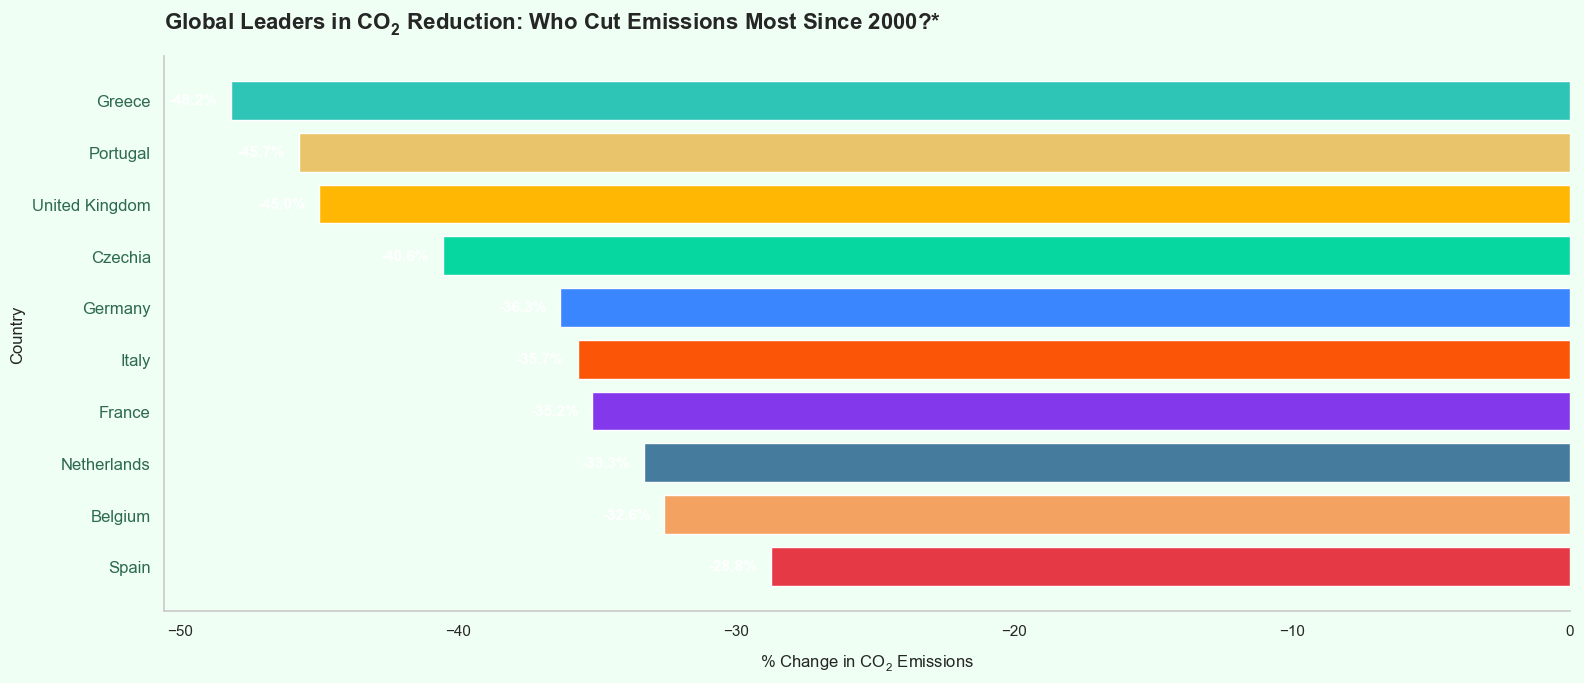

In [26]:
co2_2000 = df_countries[(df_countries['year']==2000) & (df_countries['population']>10000000)][['country','co2']].rename(columns={'co2':'co2_2000'})
co2_2024 = df_countries[(df_countries['year']==2024) & (df_countries['population']>10000000)][['country','co2']].rename(columns={'co2':'co2_2024'})
co2_change = co2_2000.merge(co2_2024, on='country')
# co2_change['change'] = co2_change['co2_2023'] - co2_change['co2_2000']
# top_reducers = co2_change.sort_values('change').head(10)
# print(top_reducers)
exclude = ['Ukraine', 'Syria', 'Yemen']
co2_change = co2_change[~co2_change['country'].isin(exclude)]
co2_change['pct_change'] = ((co2_change['co2_2024'] - co2_change['co2_2000']) / co2_change['co2_2000']) * 100
top_reducers_pct = co2_change.sort_values('pct_change').head(10)
# print(top_reducers_pct)

import matplotlib.colors as mcolors

plt.rcParams['font.family'] = 'Arial'

fig, ax = plt.subplots(figsize=(16, 7))
fig.patch.set_facecolor('#F0FFF4')
ax.set_facecolor('#F0FFF4')

top_reducers_sorted = top_reducers_pct.sort_values('pct_change', ascending=False)

distinct_colors = ['#E63946', '#F4A261', '#457B9D', '#8338EC', '#FB5607', 
                   '#3A86FF', '#06D6A0', '#FFB703', '#E9C46A', '#2EC4B6']

bars = ax.barh(top_reducers_sorted['country'], 
               top_reducers_sorted['pct_change'],
               color=distinct_colors,
               height=0.75)

for bar, val in zip(bars, top_reducers_sorted['pct_change']):
    ax.text(val - 0.5, bar.get_y() + bar.get_height()/2,
            f'{val:.1f}%',
            ha='right', va='center',
            fontsize=11, fontweight='bold', color='white')

sns.despine()
ax.grid(False)
ax.set_title('Global Leaders in $CO_2$ Reduction: Who Cut Emissions Most Since 2000?*',
             fontsize=16, fontweight='bold', pad=20, loc='left')
ax.set_xlabel('% Change in $CO_2$ Emissions', fontsize=12, labelpad=10)
ax.set_ylabel('Country', fontsize=12, labelpad=5)
ax.tick_params(axis='y', labelsize=12, labelcolor='#2D6A4F')
ax.tick_params(axis='x', labelsize=11)
plt.tight_layout()
plt.savefig('co2reduc.png', dpi=150, bbox_inches='tight')
plt.show()


All top 10 countries that have most significantly reduced CO² emissions since 2000 are European, mostly Western European. 
This suggests that economic development and emission reduction can go hand in hand as these are wealthy, industrialized nations that grew their economies while cutting carbon output.
For the rest of the world, Europe offers a blueprint that sustainability and development are not mutually exclusive.

*Note: Ukraine, Syria and Yemen were excluded from this analysis as their emission reductions are primarily attributed to conflict and economic collapse rather than climate policy.

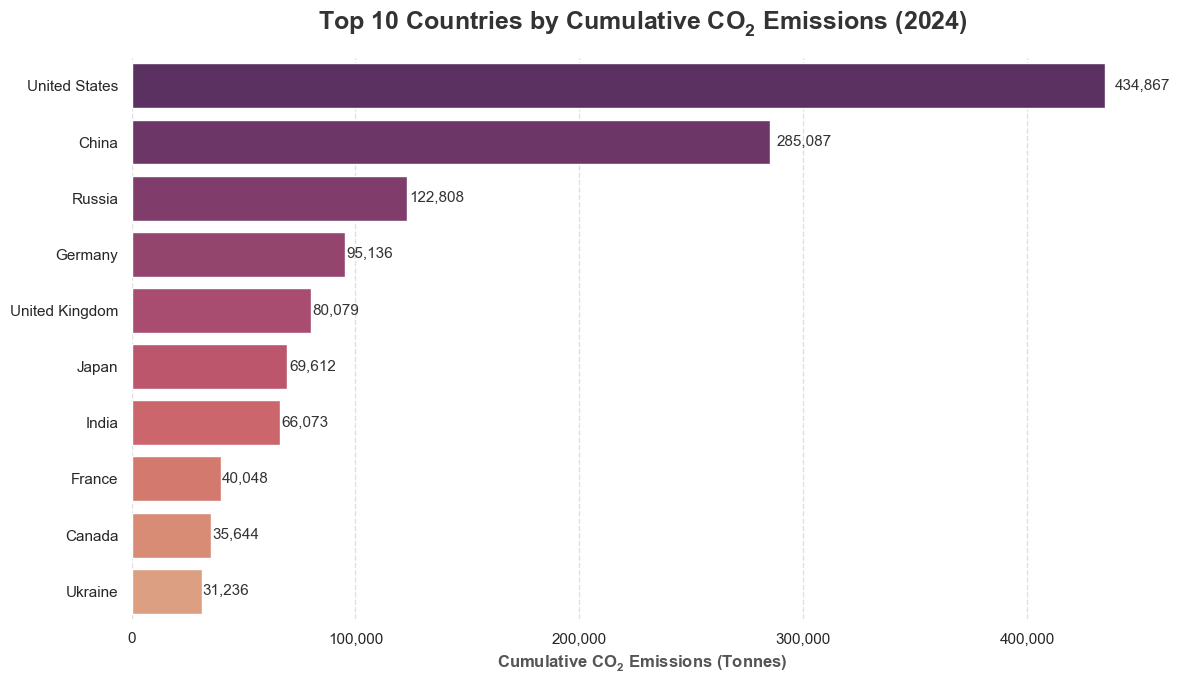

In [27]:


cum2024=df_countries[df_countries['year']==2024][['country', 'cumulative_co2']]
top10cum = cum2024.sort_values('cumulative_co2', ascending=False).head(10)

import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker



sns.set_theme(style="whitegrid") 
plt.figure(figsize=(12, 7))     

ax = sns.barplot(
    data=top10cum, 
    x='cumulative_co2', 
    y='country', 
    palette='flare_r',
    hue='country',
    legend=False
)

plt.title('Top 10 Countries by Cumulative $CO_2$ Emissions (2024)', 
          fontsize=18, fontweight='bold', pad=20, color='#333333')
plt.xlabel(r'Cumulative $CO_2$ Emissions (Tonnes)', fontsize=12, fontweight='bold', color='#555555')
plt.ylabel('', fontsize=12)

ax.xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: f'{x:,.0f}'))

for p in ax.patches:
    width = p.get_width()
    ax.text(width + (width * 0.01),
            p.get_y() + p.get_height() / 2, 
            f'{width:,.0f}',       
            ha="left", 
            va="center", 
            fontsize=11,
            color='#333333')

sns.despine(left=True, bottom=True)
ax.xaxis.grid(True, linestyle='--', alpha=0.6) 
ax.yaxis.grid(False)

plt.tight_layout()
plt.savefig('top10cumco2.png', dpi=150, bbox_inches='tight')
plt.show()


When examining cumulative CO² emissions since 1750, the USA stands far above the rest with over 434,000 million tonnes. It is worth noting that USA has emissions more than the combined total of China and Russia, who rank 2nd and 3rd respectively. This reframes the modern narrative around China being the world's biggest polluter. China only became the leading annual emitter recently, while the USA spent over a century industrializing heavily. The countries most responsible for the CO² already accumulated in the atmosphere are largely Western nations, a critical consideration in global climate justice discussions.

In [ ]:


gdpco2 = df_countries[df_countries['year']==2022][['country', 'gdp', 'co2_per_capita', 'population']].dropna()
gdpco2['gdp_per_capita'] = gdpco2['gdp'] / gdpco2['population']
gdpco2_clean = gdpco2[(gdpco2['gdp_per_capita'] > 0) & (gdpco2['co2_per_capita'] > 0)].copy()

import plotly.express as px

fig = px.scatter(
    gdpco2_clean,
    x="gdp_per_capita",
    y="co2_per_capita",
    size="co2_per_capita",     
    color="co2_per_capita",    
    hover_name="country",      
    log_x=True,             
    log_y=True,                
    size_max=45,               
    color_continuous_scale="RdYlGn_r", 
    title="Wealth vs. Carbon Footprint (2022)",
    labels={
        "gdp_per_capita": "GDP per Capita ($)",
        "co2_per_capita": "CO₂ per Capita (Tonnes)"
    }
)

fig.update_layout(
    template="plotly_white",
    xaxis_showgrid=False,
    yaxis_showgrid=False
)
fig.show()
fig.write_image('gdp_vs_co2.png')


This interactive scatter plot maps each country's wealth against its carbon footprint per person. The general trend is upward, wealthier nations tend to emit more per capita. However, the most telling insights come from the outliers. Gulf states, particularly Qatar and its neighbours, sit at the extreme top right, combining very high GDP per capita with the highest emissions in the world, driven by their fossil fuel economies and energy intensive lifestyles. Trinidad and Tobago stands out as an unexpected high emitter relative to its wealth, reflecting its oil and gas dependent economy. On the other end, Scandinavian countries like Norway and Switzerland demonstrate that high income does not have to mean high emissions, they achieve some of the world's highest living standards while maintaining relatively modest carbon footprints. This decoupling of wealth and emissions is the blueprint that the rest of the developed world is slowly following.

Conclusion

This analysis reveals that the story of global CO² emissions is not one dimensional. Current emission rankings tell only part of the story. Historical responsibility, per capita fairness, and the relationship between wealth and carbon efficiency all paint a more complex picture. The data points to a clear divide between nations actively decoupling growth from emissions and those still on an upward trajectory. For policymakers and investors in the sustainability space, these distinctions matter enormously when designing fair and effective climate action frameworks.